In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#dataset with Disney movies and total_gross
disney_df = pd.read_csv('https://query.data.world/s/mkfcxqicohry4awyjy22wa6r3qg233?dws=00000')

disney_df

#Question to solve for: Does the popularity of a Disney movie correlate with the creation of a lego set?

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [2]:
disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(str)

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].str.replace('$', '').str.replace(',', '')

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(int)


In [3]:
disney_df['total_gross'] = disney_df['total_gross'].astype(str)

disney_df['total_gross'] = disney_df['total_gross'].str.replace('$', '').str.replace(',', '')

disney_df['total_gross'] = disney_df['total_gross'].astype(int)


In [4]:
disney_df.sort_values(by='inflation_adjusted_gross', ascending=False, inplace=True)

In [5]:
disney_df.dropna(inplace=True)

In [6]:
disney_df.drop_duplicates(inplace=True)

In [7]:
df_without_duplicates = disney_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [8]:
disney_df.genre = disney_df['genre'].apply(lambda x: 'Comedy' if x in ['Romantic Comedy', 'Black Comedy'] else 'Thriller' if x in ['Thriller/Suspense', 'Horror'] else 'Musical' if x in ['Concert/Performance'] else x)

In [9]:
disney_df.genre.value_counts()

genre
Comedy         187
Adventure      119
Drama          103
Action          36
Thriller        28
Musical         17
Documentary     16
Western          7
Name: count, dtype: int64

In [10]:
top_50 = disney_df.head(50)

In [11]:
top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',
                           'Marvel Super Heroes', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 
                           'Marvel Super Heroes', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',]

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_53563/2258560670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',


In [12]:
top_50 = pd.DataFrame(top_50)

disney_df_reordered = ['theme_name', 'movie_title', 'release_date', 'genre', 'MPAA_rating', 'total_gross', 'inflation_adjusted_gross']

top_50 = top_50[disney_df_reordered]

In [13]:
top_50

,theme_name,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Disney™,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,5228953251
1,Disney™,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052
2,Disney™,Fantasia,"Nov 13, 1940",Musical,G,83320000,2187090808
8,Disney™,101 Dalmatians,"Jan 25, 1961",Comedy,G,153000000,1362870985
6,Disney™,Lady and the Tramp,"Jun 22, 1955",Drama,G,93600000,1236035515
3,Disney™,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579
564,Star Wars™,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
4,Disney™,Cinderella,"Feb 15, 1950",Drama,G,85000000,920608730
13,Disney™,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,141843000,789612346
179,Disney™,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898


In [14]:
# Local file path to the downloaded CSV file

file_path = '/Users/medirose/Downloads/lego_sets.csv'
# Read the CSV file into a DataFrame

legos_df = pd.read_csv(file_path)

In [15]:
legos_df.drop(columns=['ages', 'num_reviews', 'play_star_rating', 'prod_desc', 'val_star_rating', 'country', 'prod_id', 'star_rating'], inplace=True)

In [16]:
legos_df.review_difficulty = legos_df['review_difficulty'].apply(lambda x: 'Easy' if x in ['Very Easy'] else ('Challenging' if x in ['Very Challenging'] else x))

In [17]:
legos_df['list_price'] = legos_df['list_price'].round(2)

In [18]:
legos_df.dropna(inplace=True)

In [19]:
legos_df.drop_duplicates(inplace=True)

In [20]:
df_without_duplicates = legos_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [21]:
legos_df = pd.DataFrame(legos_df)

legos_df_reordered = ['theme_name', 'set_name', 'prod_long_desc', 'list_price', 'piece_count', 'review_difficulty']

legos_df = legos_df[legos_df_reordered]

In [22]:
legos_df = legos_df[(legos_df['theme_name'].isin(['Disney™', 'Marvel Super Heroes', 'Star Wars™']))]

In [23]:
keywords = ['The Avengers', 'Iron Man', 'Captain America', 'Winter Soldier' , 'Force Awakens', 'Rogue One', 'Dory', 'Nemo', 
            'Finding Nemo', 'Dead Man', 'Pirates of the Caribbean', 'Lion King', 
            'Cinderella', 'Lincoln', 'The Help', 'Christmas', 'Carol', 'Remember the Titans', 'Cars', 'Aladdin', 'Ratatouille', 
            'Pretty Woman', 'Wild Hogs', '101 Dalmations', 'Lady and the Tramp',
            'Jungle Book', 'Frozen', 'Inside Out', 'Ant-Man', 'Rabbit']


pattern = '|'.join(keywords)
mask = legos_df['prod_long_desc'].str.contains(pattern, case=False, regex=True)

In [24]:
legos2 = legos_df[mask]

legos2

,theme_name,set_name,prod_long_desc,list_price,piece_count,review_difficulty
248,Disney™,The Disney Castle,Bring the magical world of Disney to your home...,349.99,4080.0,Challenging
249,Disney™,Silent Mary,Bring the magic of Disney’s Pirates of the Car...,199.99,2294.0,Average
250,Disney™,Elsa's Magical Ice Palace,Build a grand and glittering Ice Palace for El...,79.99,701.0,Average
251,Disney™,Cinderella's Dream Castle,LEGO® l Disney Cinderella’s Dream Castle is th...,69.99,585.0,Challenging
255,Disney™,Cinderella's Enchanted Evening,"Reenact scenes from the iconic Disney movie, C...",39.99,350.0,Average
...,...,...,...,...,...,...
11630,Star Wars™,Kylo Ren™,Lead the First Order into battle with buildabl...,29.00,86.0,Easy
11639,Star Wars™,First Order TIE Fighter™ Microfighter,Recreate action-packed space battles with the ...,12.47,91.0,Easy
11640,Star Wars™,U-Wing™ Microfighter,Play out miniature LEGO® Star Wars adventures ...,12.47,109.0,Easy
11641,Star Wars™,TIE Striker™ Microfighter,Join the battle with this TIE Striker Microfig...,12.47,88.0,Easy


<Axes: xlabel='theme_name', ylabel='count'>

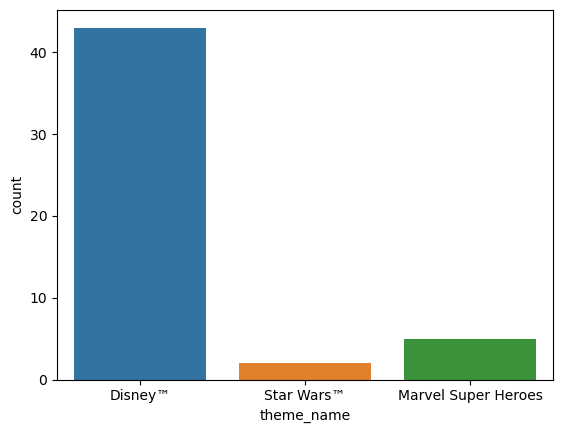

In [25]:
sns.countplot(x='theme_name', data=top_50)

<Axes: xlabel='theme_name', ylabel='count'>

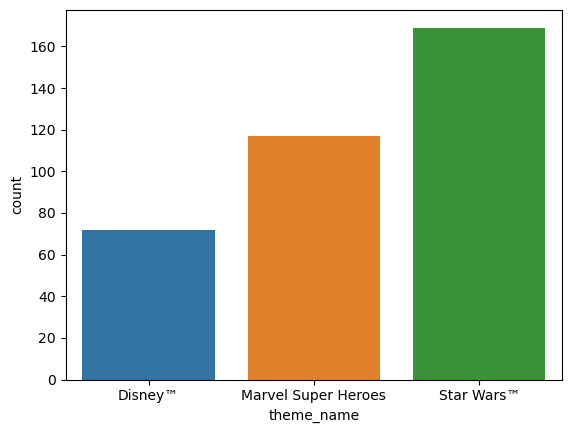

In [26]:
sns.countplot(x='theme_name', data=legos2)

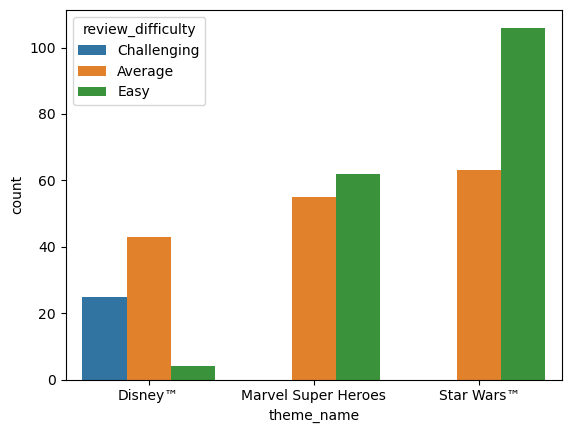

In [27]:
sns.countplot(x='theme_name', hue='review_difficulty', data=legos2)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


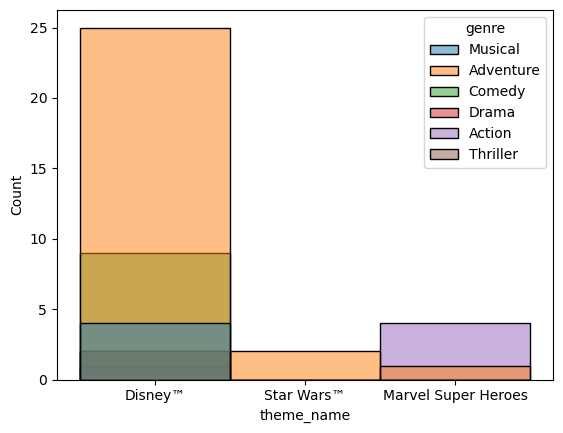

In [28]:
sns.histplot(x='theme_name', hue='genre', data=top_50)
plt.show()

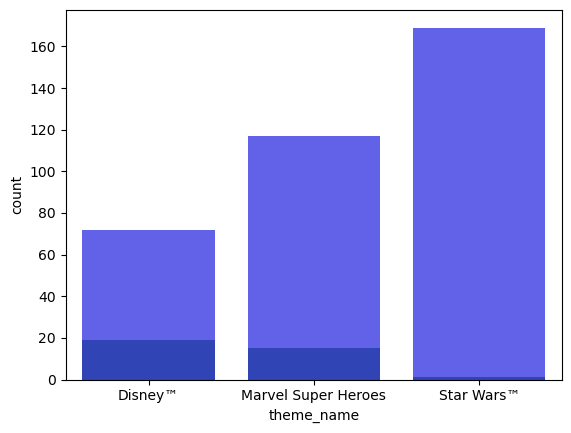

In [45]:
sns.countplot(x='MPAA_rating', data=top_50, color='green', alpha=0.7)
sns.countplot(x='theme_name', data=legos2, color='blue', alpha=0.7)
plt.show()

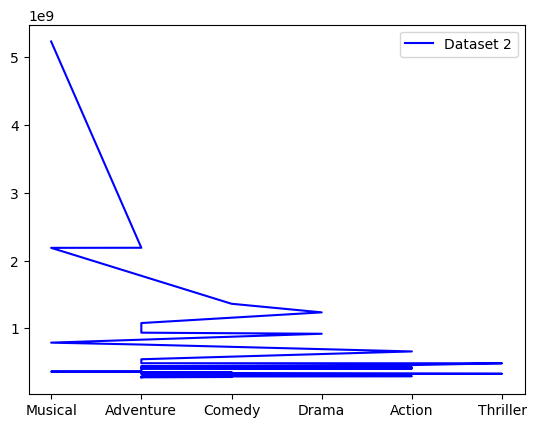

In [55]:
plt.plot(top_50['genre'], top_50['inflation_adjusted_gross'], color='blue', label='Dataset 2')
#plt.plot(legos2['theme_name'], legos2['review_difficulty'], color='red', label='Dataset 1')
plt.legend()
plt.show()

In [30]:
#action_df = disney_df[(disney_df['genre'] == 'Action')]

In [31]:
#adventure_df = disney_df[(disney_df['genre'] == 'Adventure')]

In [32]:
#drama_df = disney_df[(disney_df['genre'] == 'Drama')]

In [33]:
#comedy_df = disney_df[(disney_df['genre'] == 'Comedy')

In [34]:
#sns.countplot(x='theme_name', data=merged_df)

In [35]:
#legos2.rename(columns={'set_name': 'movie_title'}, inplace=True)

In [36]:
# Create a new column "movie_titles" in lego_df by duplicating values from "set_name"
#disneylegos_df['movie_title'] = disneylegos_df['set_name'].copy()
# Display the modified DataFrame
#disneylegos_df


In [37]:
# Apply renaming logic based on specific titles
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('elsa', 'frozen', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('cinderella', 'cinderella', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('sleeping beauty', 'maleficent', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('moana', 'moana', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('ariel', 'The little mermaid', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('mulan', 'mulan', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('anna|kristoff', 'frozen', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('mary', 'Pirates of the Caribbean', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace("berry's kitchen", 'Strawberry Shortcake', case=False)
#disneylegos_df['movie_title'] =#disneylegos_df['movie_title'].str.replace('vaiana', 'moana', case=False)
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('incredibles', case=False), 'movie_title'] = 'Incredibles 2'
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('Captain Jack Sparrow', case=False), 'movie_title'] = 'Pirates of the Caribbean'
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('belle|beast', case=False), 'movie_title'] = 'Beauty and the Beast'
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('mater', case=False), 'movie_title'] = 'Cars'
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('snow white', case=False), 'movie_title'] = 'Snow White and the Seven Dwarfs'
# Apply renaming logic based on specific titles
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('maleficent', case=False), 'movie_title'] = 'Maleficent'
#disneylegos_df.loc[#disneylegos_df['movie_title'].str.contains('pirates', case=False), 'movie_title'] = 'Pirates of the Caribbean'
# Remove instances of specified titles
#titles_to_remove = ['The Disney Castle', 'Mini-Doll Dress-Up kit', 'Castle Interior Kit', 'palace pets royal castle']
#disneylegos_df = #disneylegos_df[~#disneylegos_df['movie_title'].isin(titles_to_remove)]
# Display the modified DataFrame
#disneylegos_df

In [38]:
# Merge the datasets using the common column "movie_titles"
#merged_disney_df = pd.merge(disneylegos_df, disney_df, how='inner', on='movie_title')
# Display the merged DataFrame
#merged_disney_df

In [39]:
#top_data1 = action_df.head(10)
#top_data2 = adventure_df.head(10)
#top_data3 = drama_df.head(10)
#top_data4 = comedy_df.head(10)

#merged_df = pd.concat([top_data1, top_data2, top_data3, top_data4])

#merged_df